In [1]:
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
%matplotlib inline


In [2]:
cars  = pd.read_csv(r'C:\Users\User\Desktop\Cars\car.data')

In [3]:
cars

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [4]:
column = cars.columns


In [5]:
column

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


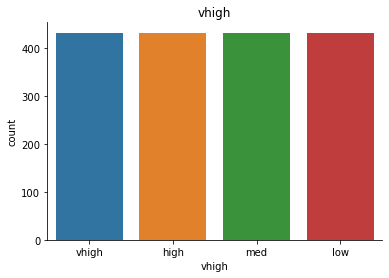

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


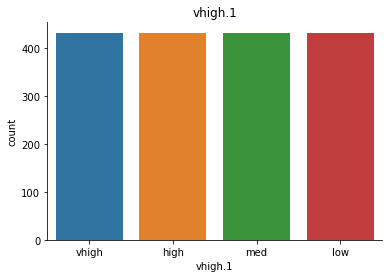

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


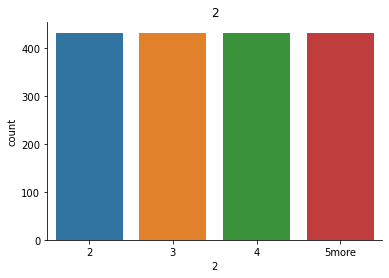

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


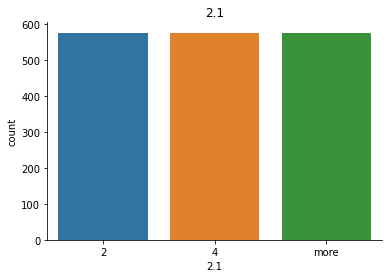

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


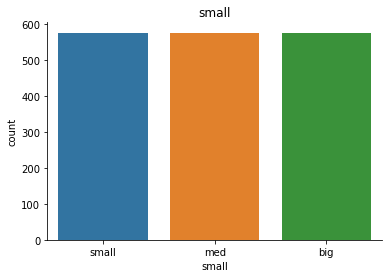

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


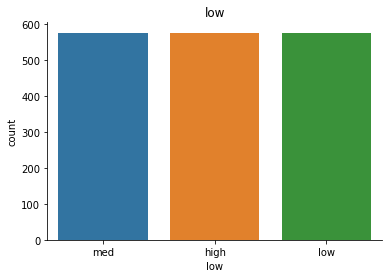

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


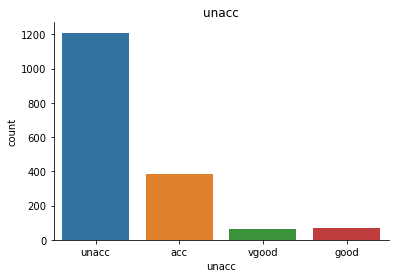

In [6]:
for x in column:
    sns.countplot(cars[x])
    plt.title(x)
    sns.despine()
    plt.show()

In [7]:
cars.isna().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [8]:
lb = LabelEncoder()

In [9]:
cars2 = cars

In [10]:
for y in column:
    cars2[y] = lb.fit_transform(cars2[y])

<AxesSubplot:>

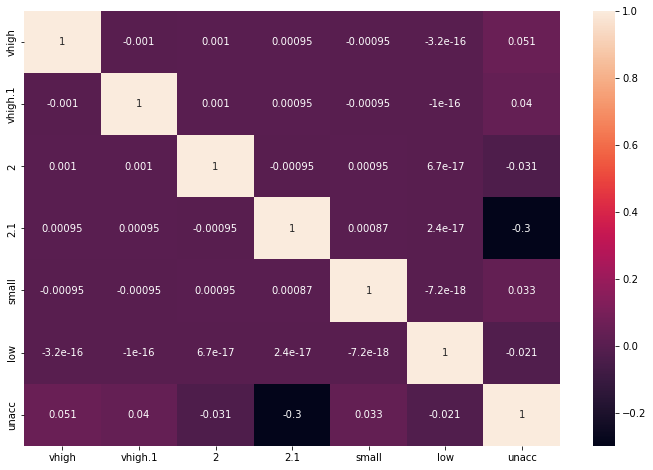

In [11]:
plt.figure(figsize = (12 , 8))
sns.heatmap(cars2.corr() , annot= True)

In [12]:
cars2

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


In [13]:
X = cars2.drop(columns = ['unacc'])
Y = cars2.unacc

In [14]:
X_train , X_test , Y_train ,Y_test = train_test_split(X , Y)

# Logistic

In [15]:
log = LogisticRegression()

In [16]:
log.fit(X_train , Y_train)

LogisticRegression()

In [17]:
log_pred = log.predict(X_test)

In [18]:
accuracy_score(log_pred , Y_test)

0.7106481481481481

# RandomForest

In [34]:
random = RandomForestClassifier(n_estimators= 90)

In [35]:
random.fit(X_train , Y_train)

RandomForestClassifier(n_estimators=90)

In [36]:
random_pred = random.predict(X_test)

In [37]:
accuracy_score(random_pred , Y_test)

0.9837962962962963

In [38]:
cross_validate(random , X , Y , cv=5)

{'fit_time': array([0.23404837, 0.21997976, 0.21571326, 0.21301079, 0.2318759 ]),
 'score_time': array([0.01999521, 0.01999927, 0.02566695, 0.01999688, 0.02298355]),
 'test_score': array([0.63872832, 0.80057803, 0.82028986, 0.85507246, 0.89275362])}

# Decission

In [24]:
dec = DecisionTreeClassifier()

In [25]:
dec.fit(X_train , Y_train)
dec_pred = dec.predict(X_test)

In [26]:
accuracy_score(dec_pred , Y_test)

0.9722222222222222

In [27]:
cross_validate(dec , X , Y , cv=5)

{'fit_time': array([0.00999331, 0.01000094, 0.        , 0.        , 0.01000094]),
 'score_time': array([0.        , 0.        , 0.01000023, 0.        , 0.        ]),
 'test_score': array([0.58092486, 0.83236994, 0.82608696, 0.86086957, 0.83768116])}

# MLPClassifier

In [28]:
mlp = MLPClassifier()

In [29]:
mlp.fit(X_train , Y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [30]:
mlp_pred = mlp.predict(X_test)

In [31]:
accuracy_score(mlp_pred , Y_test)

0.9398148148148148

In [32]:
class_list = ['unacc', 'acc', 'vgood', 'good']

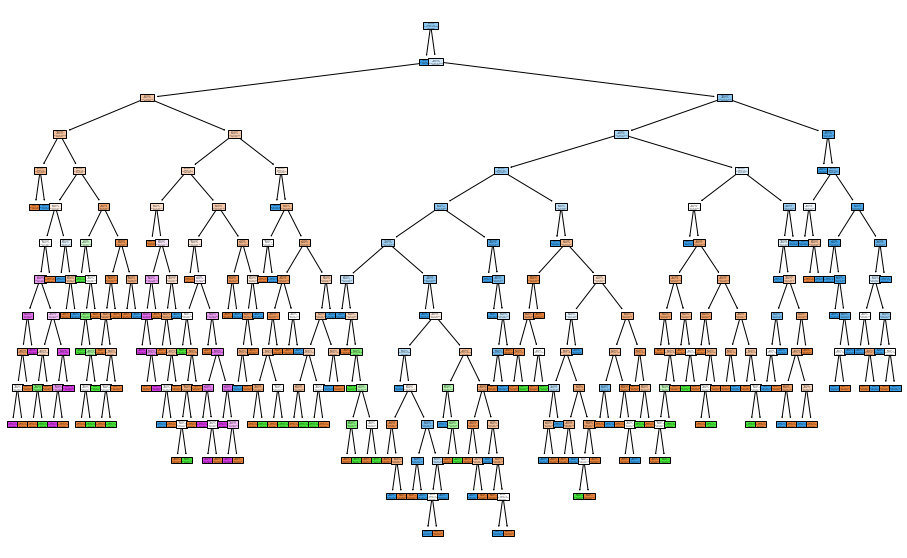

In [39]:
random.estimators_[0].tree_.max_depth
plt.figure(figsize = (16 , 10))
_ = tree.plot_tree(random.estimators_[0], feature_names=X.columns, filled=True , class_names= class_list)